## Installing Required Libraries

In [10]:
# !pip install pandas-profiling
# !pip install plotnine

## Importing Required Libraries

In [11]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
# from pandas_profiling import ProfileReport

# Reading CSV Files As Pandas Dataframes

In [12]:
## Reading csv files as dataframes
df_SF=pd.read_csv("startup_funding.csv")
df_B=pd.read_csv("Bangalore.csv")
df_D=pd.read_csv("Delhi.csv")
df_CC=pd.read_csv("Credit_Card_uses.csv")

## Printing dataframes
# df_B
# df_SF

FileNotFoundError: [Errno 2] No such file or directory: 'startup_funding.csv'

In [ ]:
df_CC.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

# ***`1) Startup Funding Dataset Analysis`***

## *A) Getting General Information about "Startup Funding Dataset"*.

In [ ]:
# Function to Standardize city names.
def group_cities(x):
    if x == "Bengaluru":
        return "Bangalore"
    if x == "New Delhi":
        return "Delhi"
    else:
        return x        

In [ ]:
# Dropping the unneccesary & Missing values columns 
df_SF['City  Location']  = df_SF['City  Location'].apply(group_cities)
df_SF.drop(['SubVertical','Remarks'],axis=1,inplace=True)
# Printing all attributes/Columns with respective no of entries and datatype.
df_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   City  Location     3044 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2096 non-null   object
dtypes: int64(1), object(7)
memory usage: 190.4+ KB


* There are total 8 columns/attributes (Except Sr No, all are categorical attributes) and 3044 records. There are too many missing values for Remarks attribute followed by SubVertical attribute, so we have dropped these attributes.

## groupby "Date"

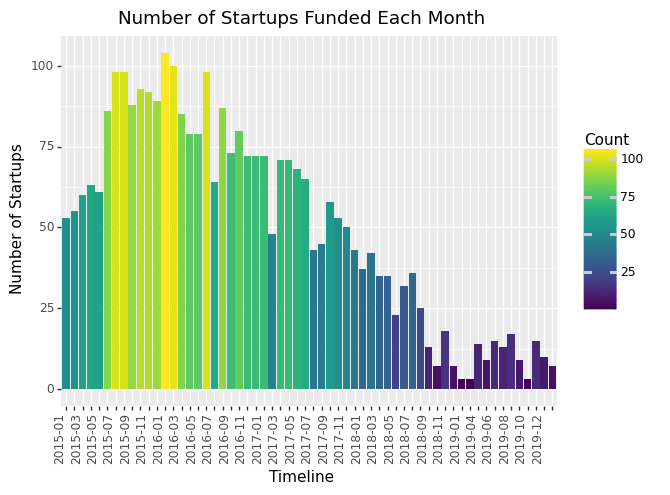

In [ ]:
df = df_SF

# Convert 'Date dd/mm/yyyy' column to pandas datetime format
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y')

# Create a new column with the month and year of each funding date and sort the DataFrame by month
df['Month'] = df['Date dd/mm/yyyy'].dt.to_period('M')
df = df.sort_values('Month')

# Group the startups by month and count the number of occurrences
monthly_count = df.groupby('Month')['Startup Name'].count().reset_index(name='Count')

# Create the bar plot using ggplot with colored bars
p = ggplot(monthly_count, aes(x='Month', y='Count', fill='Count')) + \
    geom_bar(stat='identity') + \
    ggtitle('Number of Startups Funded Each Month') + \
    xlab('Timeline') + \
    ylab('Number of Startups') + \
    theme(axis_text_x=element_text(angle=90, hjust=1))

# Modify the x-axis tick labels to show every other label
p = p + scale_x_discrete(labels = lambda x: ['' if i%2 != 0 else str(label) for i, label in enumerate(x)])

# Display the plot
print(p)

As we can see,
>    There is a rise in no of startups in India from 2015 to 2016 but from 2016 onwards, the no of startups reduced continuously. There are multiple reasons for this downfall, I have listed few ...
*  In 2016, the Indian government introduced a number of regulatory challenges for startups, such as the Goods and Services Tax (GST) and demonetization. These changes could have made it more difficult for startups to operate and survive.
* Consolidation: As the startup ecosystem in India matured, there was a trend towards consolidation, with larger companies acquiring smaller ones. This could have led to a reduction in the number of independent startups.
* Funding slowdown: After a period of rapid growth in the Indian startup ecosystem, investors became more cautious in 2016 and started to scrutinize startups more closely before investing. This led to a slowdown in funding and fewer startups being able to secure investment.

## Groupby "City  Location"

<ipython-input-170-dc928cf479b8>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


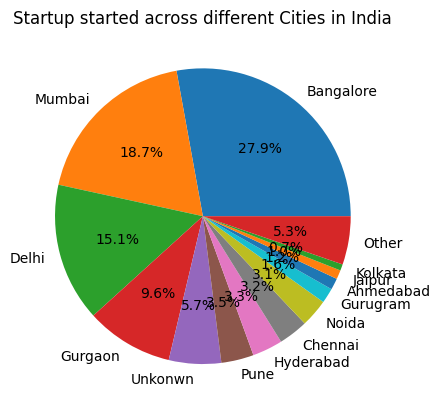

In [ ]:
df_SF_City_Location=df_SF.groupby('City  Location')
city_counts = df_SF['City  Location'].value_counts()
# set the threshold for grouping smaller cities into an "Other" category
threshold = 15 
# create a list of the major cities
major_cities = city_counts[city_counts >= threshold].index
# group the smaller cities into an "Other" category
other_cities_count = city_counts[city_counts < threshold].sum()
# create a new series with the counts for the major cities and the "Other" category
new_counts = city_counts[city_counts >= threshold].append(pd.Series(other_cities_count, index=['Other']))
# plot the pie chart for the new counts
plt.pie(new_counts, labels=new_counts.index, autopct='%1.1f%%')
plt.title('Startup started across different Cities in India')
plt.show()


* As we can see, 
>    Most of the startups are started in Major cities like Bangalore, Mumbai, Delhi etc.

## **Startup Fundings in Bangalore & Delhi...**

In [ ]:

SF_Bangalore=df_SF_City_Location.get_group('Bangalore')
print("Total number of Startups in Bangalore-->",SF_Bangalore['Sr No'].count())

SF_Delhi=df_SF_City_Location.get_group('Delhi')
print("Total number of Startups in Delhi-->",SF_Delhi['Sr No'].count())

Total number of Startups in Bangalore--> 848
Total number of Startups in Delhi--> 461


In [ ]:

print('Total number of Startups in Mumbai-->',df_SF_City_Location.get_group('Mumbai')['Sr No'].count())
print('Total number of Startups in Pune-->',df_SF_City_Location.get_group('Pune')['Sr No'].count())
print('Total number of Startups in Gurgaon-->',df_SF_City_Location.get_group('Gurgaon')['Sr No'].count())

Total number of Startups in Mumbai--> 570
Total number of Startups in Pune--> 108
Total number of Startups in Gurgaon--> 291


In [ ]:
SF_Bangalore


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Month
0,1,2020-01-09,BYJU?S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",2020-01
2,3,2020-01-09,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",2020-01
9,10,2019-12-03,Dhruva Space,Aerospace,Bangalore,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",2019-12
11,12,2019-12-17,Healthians,B2B-focused foodtech startup,Bangalore,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,"1,20,00,000",2019-12
12,13,2019-12-16,Licious,E-Commerce,Bangalore,Vertex Growth Fund,Series E,"3,00,00,000",2019-12
...,...,...,...,...,...,...,...,...,...
2862,2863,2015-04-28,Babajobs,Grey collar Job Board,Bangalore,SEEK Ltd & affiliates,Private Equity,"1,00,00,000",2015-04
2863,2864,2015-04-28,Urban Ladder,Online Furniture ecommerce,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,NaN,2015-04
2868,2869,2015-04-29,Tracxn,Startup Analytics platform,Bangalore,SAIF Partners,Private Equity,"35,00,000",2015-04
2869,2870,2015-04-29,Dazo,Mobile Food Ordering app,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,2015-04


In [ ]:
SF_Delhi


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Month
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Delhi,Vinod Khatumal,Pre-series A,"30,00,000",2020-01
27,28,2019-11-19,Digital Mall Asia,E-Commerce,Delhi,Amour Infrastructure,Seed Funding,"22,00,00,000",2019-11
45,46,2019-08-01,Progcap,Finance,Delhi,Sequoia India,Series A,"50,00,000",2019-08
63,64,2019-07-01,WizCounsel,Compliance,Delhi,Kapil Dev,Angel,"1,45,000",2019-07
66,67,2019-07-04,Daalchini Technologies,Food and Beverage,Delhi,Artha Venture,Seed Round,"5,00,000",2019-07
...,...,...,...,...,...,...,...,...,...
2847,2848,2015-04-22,FindYahan,Hyperlocal services marketplace,Delhi,The Phoenix Fund,Private Equity,NaN,2015-04
2849,2850,2015-04-22,Avanti Learning,Private Coaching Centers,Delhi,"Michael & Susan Dell Foundation, Pearson Learn...",Private Equity,"15,00,000",2015-04
2855,2856,2015-04-23,EazyDiner,Restaurant reservation app,Delhi,"Deepak Shahdadpuri, Gulpreet Kohli",Seed Funding,NaN,2015-04
2856,2857,2015-04-23,Phone Warrior,Spam Call block App,Delhi,Lightspeed Ventures,Seed Funding,NaN,2015-04


## Top 5 cities in India with Maximum no of Startups started.

Bangalore   848

Mumbai  570

Delhi   461

Gurgaon  291

Pune  108

## groupby "InvestmentnType"

* InvestmentnType in the startup funding refers to the type of investment made by the investor(s) in the startup. This include different types of funding such as private equity,seed funding, venture capital, angel investment, or debt financing etc.

* Private Equity: Private equity is a type of investment where investors provide capital to a company in exchange for an ownership stake in the company.

* Seed Funding: Seed funding is a type of funding that is provided to startups in their earliest stages of development. The purpose of seed funding is to help the startup get off the ground and develop a prototype or minimum viable product (MVP).

In [ ]:
data=df_SF
data['InvestmentnType'] = data['InvestmentnType'].astype(str)
data['InvestmentnType'] = data['InvestmentnType'].apply(lambda x:"Pre Series A" if "pre" in x.lower() else x)
data['InvestmentnType'] = data['InvestmentnType'].apply(lambda x:"Debt Funding" if "Debt" in x else x)
data['InvestmentnType'] = data['InvestmentnType'].apply(lambda x:"Seed Funding" if "Seed" in x else x)
data['InvestmentnType'] = data['InvestmentnType'].apply(lambda x:"Private Equity" if "Private" in x else x)

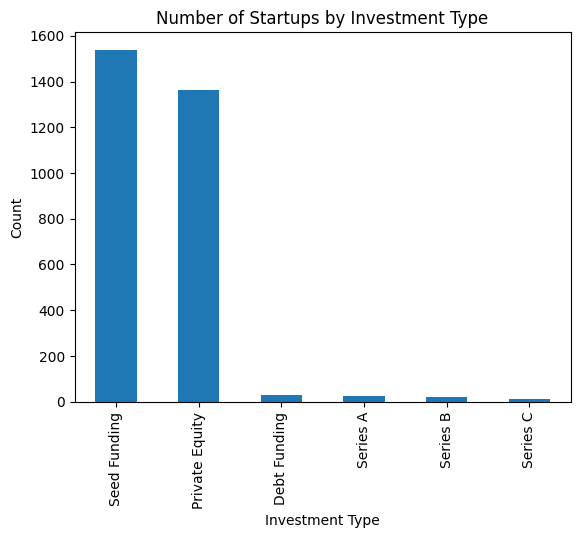

In [ ]:
 # Take Guru code
df_SF_InvestmentnType=df_SF.groupby("InvestmentnType")

# Count the number of occurrences of each InvestmentnType
investment_counts = df_SF['InvestmentnType'].value_counts()[:6]

# Create a bar chart of the investment counts
investment_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Investment Type')
plt.ylabel('Count')
plt.title('Number of Startups by Investment Type')

# Show the plot
plt.show()


* Most of the startups in India has started with investment type as a Private Equity or Seed Funding.

## groupby "Industry Vertical"

In [ ]:
# Function to Standardize city names.
def group_industryVertical(x):
    if x == "E-Commerce" or x=="ECommerce":
        return "eCommerce"
    else:
        return x        

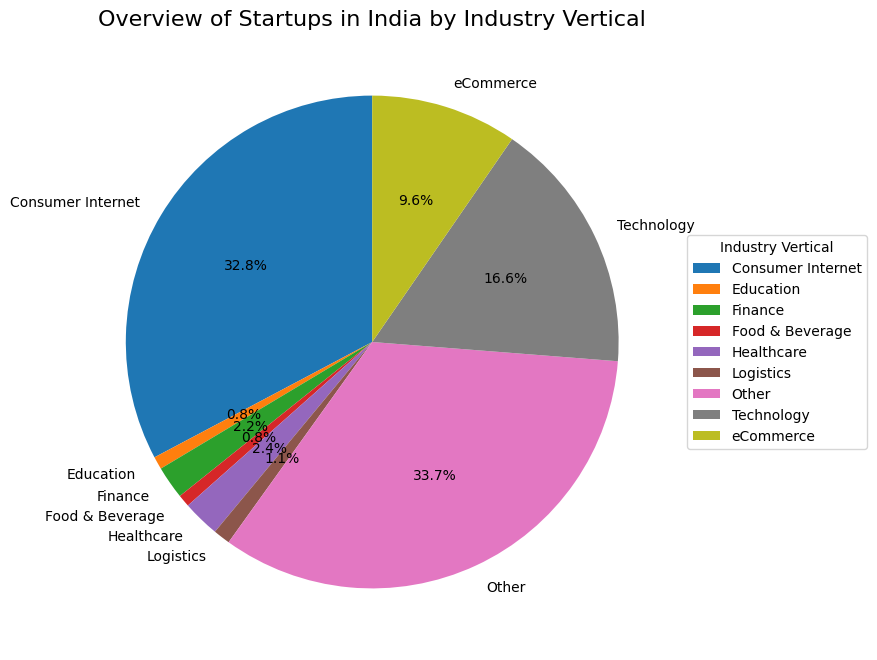

In [ ]:
df=df_SF

df_SF['Industry Vertical']  = df_SF['Industry Vertical'].apply(group_industryVertical)
# group the startups by industry vertical and count the number of occurrences
vertical_count = df.groupby('Industry Vertical')['Sr No'].count().reset_index(name='Count')

# combine all industry verticals with less than 20 startups into an "Other" category
vertical_count.loc[vertical_count['Count'] < 20, 'Industry Vertical'] = 'Other'
vertical_count = vertical_count.groupby('Industry Vertical')['Count'].sum().reset_index()

# create a pie chart of the count of startups by industry vertical
plt.figure(figsize=(8, 8))
plt.pie(vertical_count['Count'], labels=vertical_count['Industry Vertical'], startangle=90, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Overview of Startups in India by Industry Vertical', fontsize=16)
plt.legend(title='Industry Vertical', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

* Most of the startups are software company related (Industry vertical-->Consumer Internet,Technology & eCommerce)

## groupby "Industry Vertical" specifically for Bangalore and Delhi.

<ipython-input-179-1b6d9a0f963d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


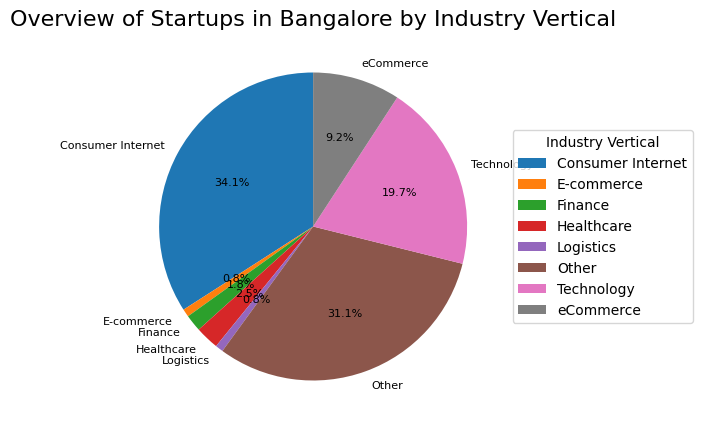

In [ ]:
## For Bangalore
df = df_SF[df_SF['City  Location'] == 'Bangalore']

df['Industry Vertical'] = df['Industry Vertical'].apply(group_industryVertical)
vertical_count = df.groupby('Industry Vertical')['Sr No'].count().reset_index(name='Count')

# combine all industry verticals with less than 20 startups into an "Other" category
vertical_count.loc[vertical_count['Count'] < 7, 'Industry Vertical'] = 'Other'
vertical_count = vertical_count.groupby('Industry Vertical')['Count'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(vertical_count['Count'], labels=vertical_count['Industry Vertical'], startangle=90, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Overview of Startups in Bangalore by Industry Vertical', fontsize=16)
plt.legend(title='Industry Vertical', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


<ipython-input-180-c4db069f0a7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


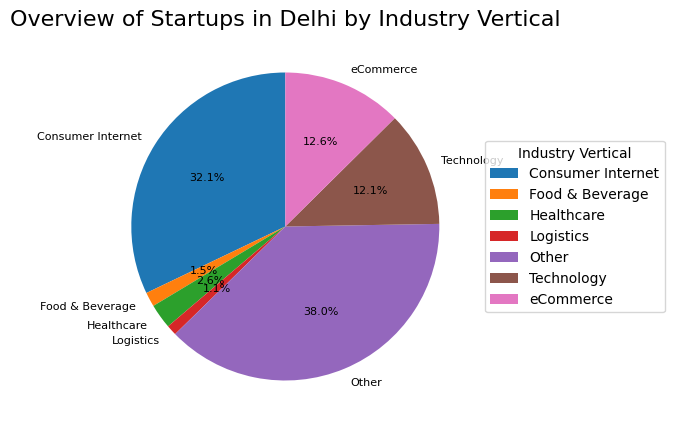

In [ ]:
## For Delhi
df = df_SF[df_SF['City  Location'] == 'Delhi']

df['Industry Vertical'] = df['Industry Vertical'].apply(group_industryVertical)
vertical_count = df.groupby('Industry Vertical')['Sr No'].count().reset_index(name='Count')

# combine all industry verticals with less than 20 startups into an "Other" category
vertical_count.loc[vertical_count['Count'] < 5, 'Industry Vertical'] = 'Other'
vertical_count = vertical_count.groupby('Industry Vertical')['Count'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(vertical_count['Count'], labels=vertical_count['Industry Vertical'], startangle=90, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Overview of Startups in Delhi by Industry Vertical', fontsize=16)
plt.legend(title='Industry Vertical', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## *B) Insights From "Startup Funding Dataset".*


* we have Startups in India data of 5 years (2015-2020) with 1035 distinct dates.
* "Sir Ratan Tata" has started 25 startups in India from 2015 to 2020 which is maximum by an induvisual.
* Westbridge Capital has started 'Rapido Bike Taxi' startup with highest amount of 3900,000,000 Rs.
* Most of the startups has started in major cities like Bangalore, Mumbai, Delhi etc.
* Most of the startups are software company related (Industry vertical-->Consumer Internet,Technology & eCommerce)

# ***`2) Bangalore Dataset Analysis`***

## *A) Getting General Information about "Bangalore Dataset".*

In [ ]:
## Printing all attributes/Columns with respective count and datatype.
df_B.drop('society',axis=1,inplace=True)
df_B.info()
print('Avg value of plot in Bangalore is ',sum(df_B.price)//13320,'lakhs')
df_B['price']=df_B['price']*10**5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  float64
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), object(4)
memory usage: 832.6+ KB
Avg value of plot in Bangalore is  112.0 lakhs


* It has 8 columns(3 numeric variables-->bath,balcany,price and remaining 5 are categorical variables) and 13320 plots/records.
* There are 267 duplicate entries & so many missing values in column 'society', so I have dropped it.
* Avg value of plot in Bangalore is  112.0 lakhs.

In [ ]:
## Adding new column Per_sqft and calculating avg Price per sqft in Bangalore
df_B['total_sqft']=df_B['total_sqft'].astype('float')
df_B['Per_sqft']=df_B['price']/df_B['total_sqft']
print('Average price per square feet in Bangalor --> ',np.mean(df_B['Per_sqft']),'Rs')

Average price per square feet in Bangalor -->  8100.604736379252 Rs


In [ ]:
df_B

,area_type,availability,location,size,total_sqft,bath,balcony,price,Per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,3907000.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,12000000.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,6200000.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,9500000.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,23100000.0,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,NaN,40000000.0,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,6000000.0,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,48800000.0,10407.336319


## Groupby "location"

In [ ]:
# Group the data by location
df_B_location = df_B.groupby('location')

# Filter the groups with count less than or equal to 100
grouped_data_filtered = df_B_location.filter(lambda x: len(x) > 100)

# Get the count of each remaining group
location_count = grouped_data_filtered.groupby('location').size()
# print(location_count)

# Sort the filtered locations by count in descending order
df_B_major_location = location_count.sort_values(ascending=False)

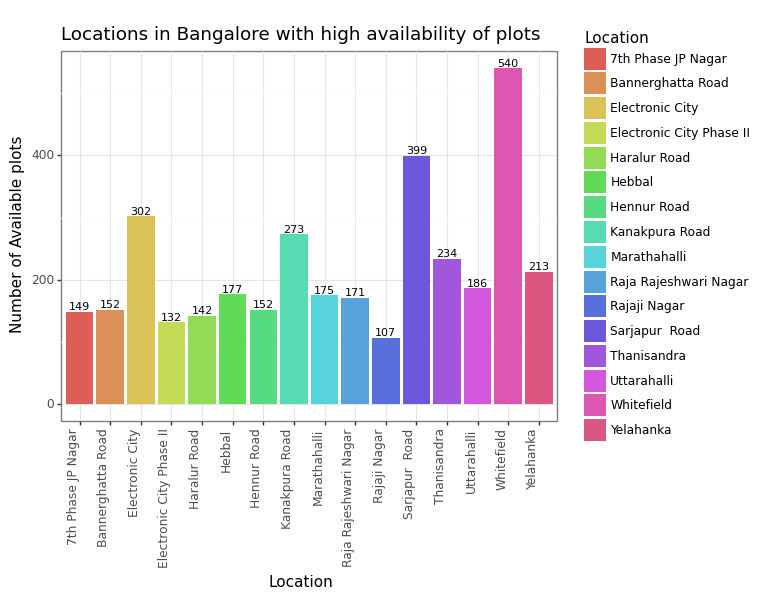

<ggplot: (8791896344264)>

In [ ]:
# Get the count of each remaining group
location_count = grouped_data_filtered.groupby('location').size()

# Sort the filtered locations by count in descending order
location_count = location_count.sort_values(ascending=False)

# Convert location_count series to a dataframe and reset the index
df_location_count = location_count.to_frame(name='count').reset_index()

# Convert count column to integer
df_location_count['count'] = df_location_count['count'].astype(int)

# Define a custom color palette for the bars
colors = ['#5F9EA0', '#66CDAA', '#3CB371', '#32CD32', '#228B22', '#006400']

# Create the ggplot object with location_count dataframe as the data source
ggplot(df_location_count, aes(x='location', y='count', fill='location')) \
    + geom_bar(stat='identity') \
    + geom_text(aes(label='count'), va='bottom', size=8, position=position_dodge(width=1), color='black') \
    + theme_bw() \
    + theme(axis_text_x=element_text(angle=90, hjust=1)) \
    + labs(title="Locations in Bangalore with high availability of plots", x="Location", y="Number of Available plots") \
    + guides(fill=guide_legend(title="Location"))


### What is the main reason behind more plottings in Whitefield, Electronic city, Sarjapur road, Kanakpura road and Thanisandra road?

---->>Growing IT Parks 

* International Tech Park commonly known as ITPL is a tech park located in Whitefield, Bangalore. It is the oldest & largest IT/ Tech Park in Bangalore started in 1992.
* Electronics City is one of the largest electronic industrial parks in India spread over 332 acres of area.There are over 200 IT companies housed in the Electronics City. Some of these companies include General Electric, Biocon, Bosch, Tech Mahindra, Wipro Technologies and TCS.
* Sarjapur Road is surrounded by many renowned IT Parks and Tech hubs. The IT boom in adjacent neighbourhoods of Electronic City and Whitefield acted as a catalyst for Sarjapur Road to top-listed property markets of Bangalore. 
* Thanisandra Road is becoming attractive because of its proximity to Manyata Tech Park & from kanakpur road, it is straightforward to get to the employment hubs of Sarjapur Road and Electronic City.


In [ ]:
Whitefield=df_B_location.get_group('Whitefield')
print('Average Prize of plots in Whitefield is ',Whitefield.price.mean(),'lakhs.')
Whitefield

Average Prize of plots in Whitefield is  12801232.407407407 lakhs.


,area_type,availability,location,size,total_sqft,bath,balcony,price,Per_sqft
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,3800000.0,3247.863248
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.0,2.0,2.0,7000000.0,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,29500000.0,10592.459605
27,Built-up Area,20-Dec,Whitefield,3 BHK,1610.0,3.0,2.0,8100000.0,5031.055901
47,Super built-up Area,20-Sep,Whitefield,2 BHK,1459.0,2.0,1.0,9482000.0,6498.971899
...,...,...,...,...,...,...,...,...,...
13235,Super built-up Area,Ready To Move,Whitefield,3 BHK,1730.0,3.0,2.0,12500000.0,7225.433526
13257,Super built-up Area,Ready To Move,Whitefield,3 BHK,1453.0,2.0,2.0,5800000.0,3991.741225
13258,Super built-up Area,19-Dec,Whitefield,1 BHK,877.0,1.0,1.0,5900000.0,6727.480046
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,2830.0,5.0,0.0,15450000.0,5459.363958


* There are 1305 locations in Bangalore where we available with 13320 plots.
* Maximum 540 plots are available in Whitefield with avg costs around 128 lakhs.
* Locations near to IT parks (ie. Whitefield,Electronic city, Sarjapur road etc) has available with large no. of plottings.

## price Vs total_sqft in 5 locations with area type & size

In [ ]:
df=df_B
d1 = df[df['location'] == 'Whitefield']
d2 = df[df['location'] == 'Sarjapur  Road']
d3 = df[df['location'] == 'Electronic City']
d4 = df[df['location'] == 'Kanakpura Road']
d5 = df[df['location'] == 'Thanisandra']

In [ ]:
filtered_data = pd.concat([d1,d2,d3,d4,d5])
filtered_data = filtered_data[filtered_data['total_sqft']<8000]
# filtered_data = filtered_data[filtered_data['size']=='1 BHK' or filtered_data['size']=='2 BHK' or filtered_data['size']=='3 BHK' or filtered_data['size']=='4 BHK']

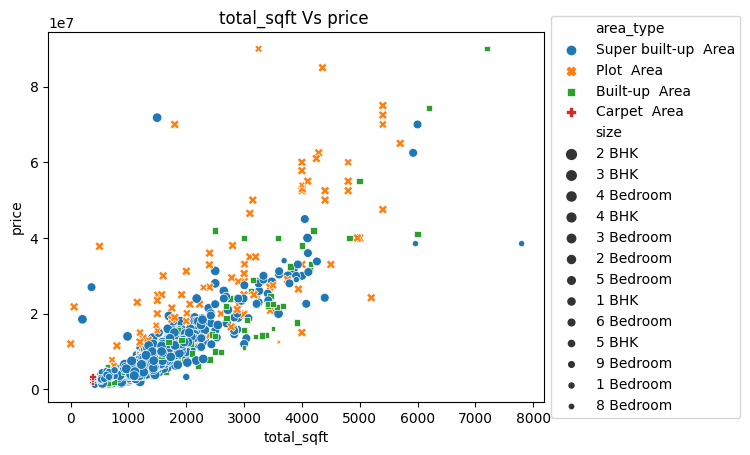

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(filtered_data,x = "total_sqft",y = "price",hue = "area_type",size = 'size',sizes = (10,50),style = 'area_type')
plt.title("total_sqft Vs price ")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Groupby "area_type"

>Built-up Area: The built-up area includes the carpet area of the property plus the area occupied by walls and other areas like balconies and terraces.

>Super Built-up Area: The super built-up area includes the built-up area along with a portion of the common areas such as the lobby, staircase, elevator, and other amenities.

>Carpet Area: The carpet area is the actual usable area inside the property that excludes the area occupied by walls.

>Plot Area: The plot area refers to the total area of the land on which the property is built.


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64
Average Prize of plots in Super built-up Area is  9297175.711035267 lakhs.


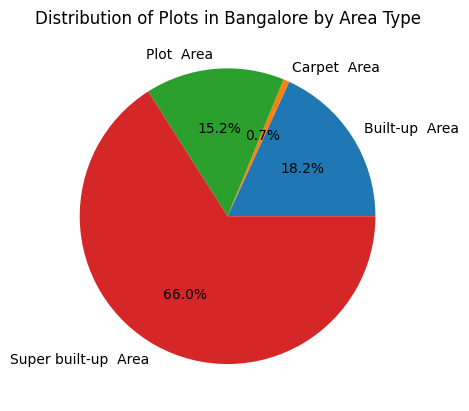

In [ ]:
df_B_area_type=df_B.groupby(by='area_type')
print(df_B_area_type.size())
sba=df_B_area_type.get_group('Super built-up  Area')
print('Average Prize of plots in Super built-up Area is ',sba.price.mean(),'lakhs.')

sizes = df_B_area_type.size().values
labels = df_B_area_type.size().index

# plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Plots in Bangalore by Area Type')
plt.show()


* There are 4 type of plots available. Nearly 80% of plots are super built up and avg. price of super built up plot is 93 lakhs.

## Price Dependancy on location, size and total_sqft

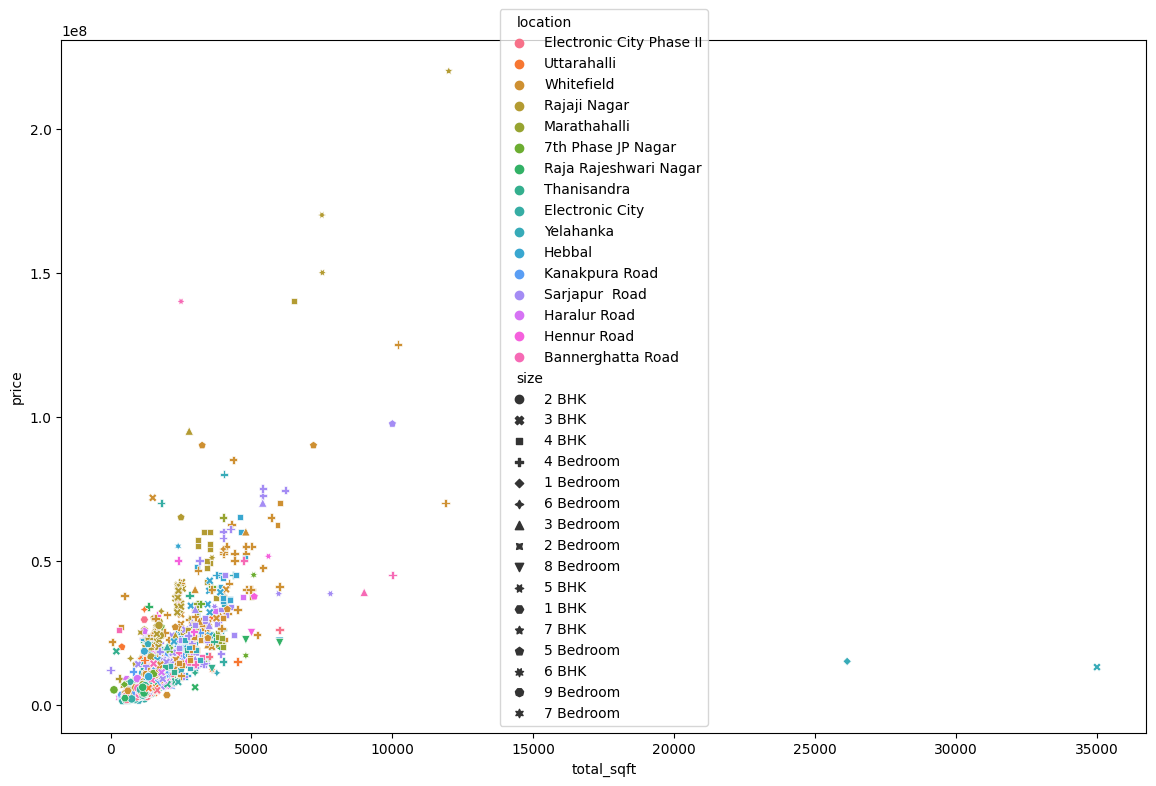

In [ ]:
# Filter the locations in Bangalore with plot count greater than 100
filtered_data = df_B_location.filter(lambda x: len(x) > 100)

fig = plt.figure(figsize =(14, 9))
sns.scatterplot(data=filtered_data,x='total_sqft',y='price',hue='location',style='size')
plt.show()


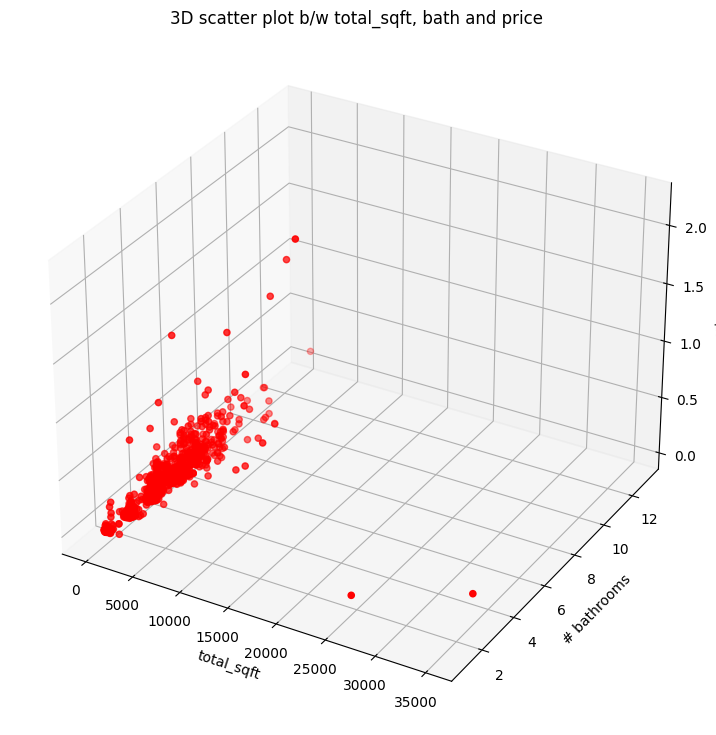

In [ ]:

fig = plt.figure(figsize =(20, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot
x=filtered_data['total_sqft']
y=filtered_data['bath']
z=filtered_data['price']

ax.scatter(x, y, z, color='red')

plt.title('3D scatter plot b/w total_sqft, bath and price')
ax.set_xlabel('total_sqft')
ax.set_ylabel('# bathrooms')
ax.set_zlabel('price')

plt.show()

## Price column

In [ ]:
print('Min price of a plot in Bangalore is ',min(df_B['price']),'lakhs.')
print('Average price of a plot in Bangalore is ',np.mean(df_B['price']),'lakhs.')
print('Max price of a plot in Bangalore is ',max(df_B['price']),'lakhs.')

Min price of a plot in Bangalore is  800000.0 lakhs.
Average price of a plot in Bangalore is  11256562.65015015 lakhs.
Max price of a plot in Bangalore is  360000000.0 lakhs.


## *B) Insights From "Bangalore Dataset"*.

* Approximately 80% of plots are available as ready to move (ie. construction is over & you just need to buy and then it is ready to use.)
* Generally, plots are either 2 BHK or 3 BHK. Also you can available with 1 RK, 1 BHK and also 11 Bedroom & 14 BHK.
* On an avg. each plot has 3 bathrooms, but some plots has 40 bathrooms.
* On an avg. each plot has 2 to 3 balcanies.

* I have to find out areas/locations in Bangalore where plots are expensive(ie.high price) than other areas with same constraints(total_sqft,size,balcony & bath).

# ***`3) Delhi Dataset Analysis`***

## *A) Getting General Information about "Delhi Dataset".*

In [ ]:
## Printing all attributes/Columns with respective count and datatype.
df_D.info()
print('Avg value of plot in Delhi is ',sum(df_D.Price)//1259,'Rs')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB
Avg value of plot in Delhi is  21306703 Rs


* It has 11 columns and 1259 plots/records. There are no much missing values. There are 6 numeric variables(ie.Area,BHK,bathroom,Parking,price,Per_Sqft) and remaining 5 are categorical.
* Most of the values in Per_sqft are incorrect or missing. Lets calculate Per_sqft = Price/Area

In [ ]:
# Most of the values in Per_Sqft column are overwritten or missing.
# Realculating the Per_Sqft values
df_D['Per_Sqft'] = df_D['Price'] / df_D['Area']

## groupby "Furnishing"

Furnishing refers to the level of furniture and appliances provided in a property. In the context of real estate, a furnished property typically includes essential furniture like beds, sofas, chairs, tables, and appliances like refrigerator, washing machine, etc. An unfurnished property, on the other hand, is an empty unit with no furniture or appliances.

Semi-furnished properties generally have a few basic furnishings, such as a wardrobe, kitchen cabinets, and may include some appliances.

The level of furnishing can affect the rental or selling price of a property, as fully furnished properties generally command higher prices than unfurnished or semi-furnished properties due to the convenience they offer to tenants.

Type of plots in Delhi with availability
Furnished --> 183
Semi-Furnished --> 708
Unfurnished --> 363


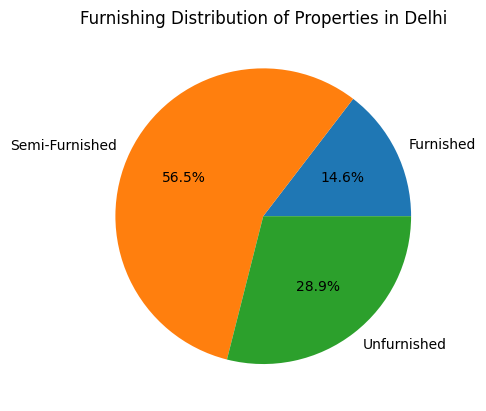

In [ ]:
df_D_Furnishing=df_D.groupby(by="Furnishing")
print("Type of plots in Delhi with availability")
df_D_Furnished=df_D_Furnishing.get_group('Furnished')
print("Furnished -->",df_D_Furnished['Area'].count())
df_D_SemiFurnished=df_D_Furnishing.get_group('Semi-Furnished')
print("Semi-Furnished -->",df_D_SemiFurnished['Area'].count())
df_D_Unfurnished=df_D_Furnishing.get_group('Unfurnished')
print("Unfurnished -->",df_D_Unfurnished['Area'].count())

# Group the dataframe by Furnishing and count the number of occurrences
df_D_Furnishing_count = df_D.groupby('Furnishing')['Furnishing'].count()

# Plot the pie chart
plt.pie(df_D_Furnishing_count, labels=df_D_Furnishing_count.index, autopct='%1.1f%%')
plt.title('Furnishing Distribution of Properties in Delhi')
plt.show()

In [ ]:
# Calculate avg price per sqft of Furnished, Semi-Furnished and Unfurnished plots in Delhi.

avg_price_by_type = df_D_Furnishing['Per_Sqft'].mean()
# Print the average price per square foot for each property type
print(avg_price_by_type)


Furnishing
Furnished         14768.089597
Semi-Furnished    14927.302808
Unfurnished       13823.583100
Name: Per_Sqft, dtype: float64


* Here we can see that, Unfurnished plots are less expensive than furnished plots. Also, here Semi-Furnished plots are slightly more expensive, this might b'z of locality(Expensive locality areas in Delhi might have semi_furnished plots instead of Furnished plots).

## groupby "Locality"

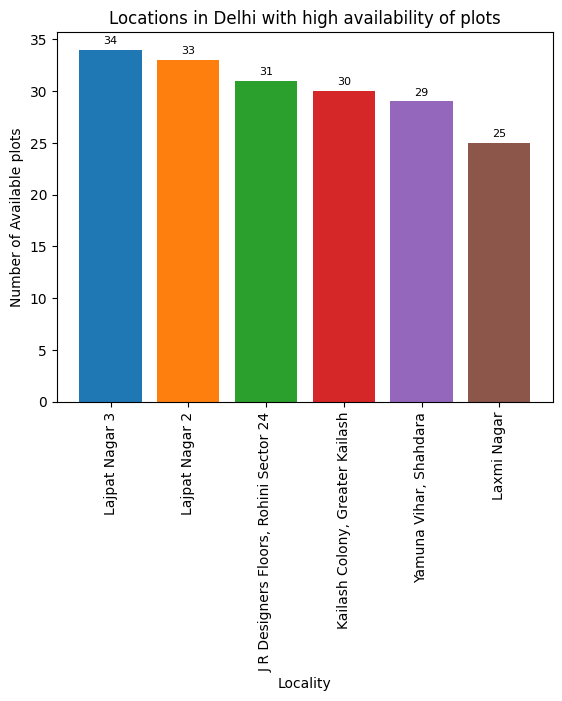

In [ ]:
df_D_Locality=df_D.groupby("Locality")

# Count the no. of plots in Locality.
locality_counts = df_D['Locality'].value_counts().sort_values(ascending=False)

# Create a list of localities with count >= 25
localities = []
counts = []
for locality, count in locality_counts.items():
    if count >= 25:
        localities.append(locality)
        counts.append(count)


# Set the color palette
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot the bar plot
fig, ax = plt.subplots()
bars = ax.bar(localities, counts, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Locality')
plt.ylabel('Number of Available plots')
plt.title('Locations in Delhi with high availability of plots')

# Put the corresponding y-axis value on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.show()



As we expected,

* Lajpat nagar & Greter Kailash areas in Delhi are nearer to IT Park.

In [ ]:
df_D_major_Locality = df_D.loc[df_D['Locality'].isin(locality_counts.index[locality_counts >= 25])]
df_D_major_Locality

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,9000.000000
35,1450.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,2.0,30000000,Ready_to_move,New_Property,Builder_Floor,20689.655172
39,1710.0,3,3.0,Semi-Furnished,Lajpat Nagar 2,4.0,26000000,Ready_to_move,New_Property,Builder_Floor,15204.678363
42,1260.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,1.0,21000000,Ready_to_move,Resale,Builder_Floor,16666.666667
...,...,...,...,...,...,...,...,...,...,...,...
480,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667
533,1000.0,2,2.0,Unfurnished,Laxmi Nagar,1.0,7500000,Ready_to_move,Resale,Apartment,7500.000000
536,990.0,3,2.0,Unfurnished,Laxmi Nagar,1.0,4000000,Ready_to_move,Resale,Apartment,4040.404040
537,450.0,2,1.0,Semi-Furnished,Laxmi Nagar,1.0,3500000,Ready_to_move,Resale,Builder_Floor,7777.777778


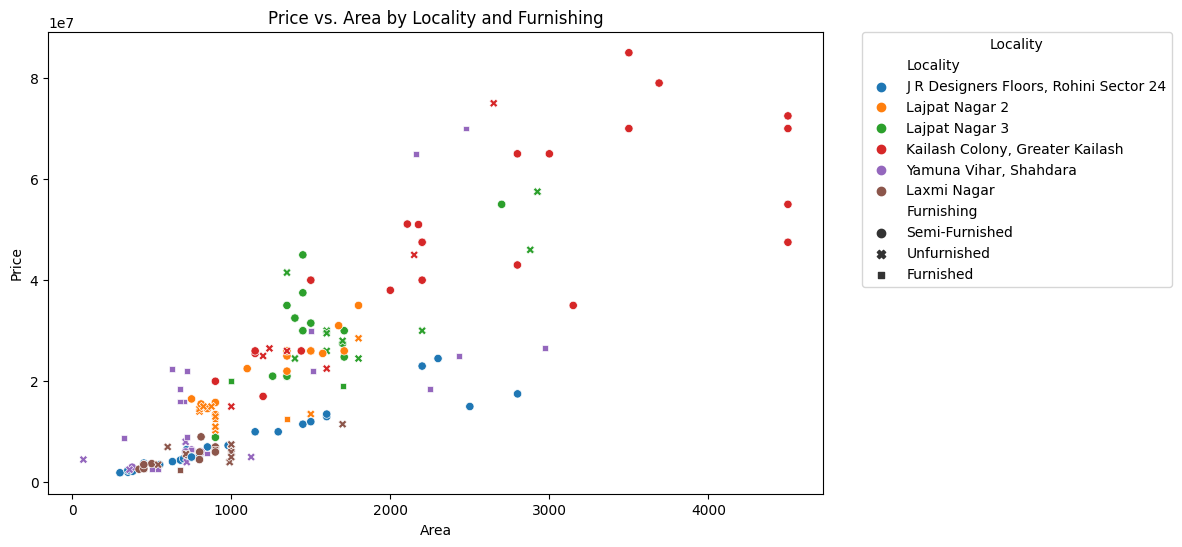

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_D_major_Locality, x='Area', y='Price', hue='Locality', style='Furnishing')
ax.set_title('Price vs. Area by Locality and Furnishing')

# Adjust legend position and size
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.show()


Here, We can see that,
 * Yamuna vihar & Laxmi nagar available with plots with small area at low price.
 * Rohini sector 24 available with wide variety of plots in terms of area, at low price.
 * Lajpat nagar has plots at affordable price.
 * Kailash colony has plots with huge area and also quite expensive as well.

## Actual values
* We can see the actual price per sqft for these localities from following...

In [ ]:
delhi_df=df_D_major_Locality

# Sort the dataframe by `Per_Sqft` column in descending order
delhi_df_sorted = delhi_df.sort_values('Per_Sqft', ascending=False)

# Select the top 25 localities with the highest Per_Sqft values
n = 6
top_localities = delhi_df_sorted.loc[delhi_df_sorted['Locality'].isin(delhi_df_sorted['Locality'].value_counts().index[:n])]

# Calculate the average Per_Sqft value for each locality
locality_avg_per_sqft = top_localities.groupby('Locality')['Per_Sqft'].mean()

# Sort the localities by their average Per_Sqft value in descending order
locality_avg_per_sqft = locality_avg_per_sqft.sort_values(ascending=False)

# Print the top localities with their average Per_Sqft value
print(locality_avg_per_sqft)

Locality
Kailash Colony, Greater Kailash           19506.570706
Lajpat Nagar 3                            19201.035878
Yamuna Vihar, Shahdara                    16038.343980
Lajpat Nagar 2                            15971.388351
J R Designers Floors, Rohini Sector 24     7299.570044
Laxmi Nagar                                6866.833269
Name: Per_Sqft, dtype: float64


## *B) Insights From "Delhi Dataset"*.

* Most of the plots in Delhi are available as ready to move (ie. construction is over & you just need to buy and then it is ready to use) only few are Almost ready.
* Generally, plots are either 2 BHK or 3 BHK
* Most of the plots are Semi Furnished, some are fully furnished and some are unfurnished.
* Most of the entries in Per_sqft column are wrong need to calculate from Price & Area.

# ***`4) Credit Card Uses Dataset Analysis`***

## *A) Getting General Information about "Credit Card Uses Dataset"*.

In [ ]:
## Printing all attributes/Columns with respective count and datatype.
df_CC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


* There are total 7 columns/attributes(index, Amount are numeric attributes while remaining 5 are categorical attributes) and 26052 records. There are no missing values & duplicate records present in Dataset.


## groupby "Date"

In [ ]:
df = df_CC
# Convert the 'Date' column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for the day of the week, month, and year
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

## Weekly and Monthly Credit Card Uses in India
**Number of Credit Cards Used per Day of the Week stacked with Exp Type**

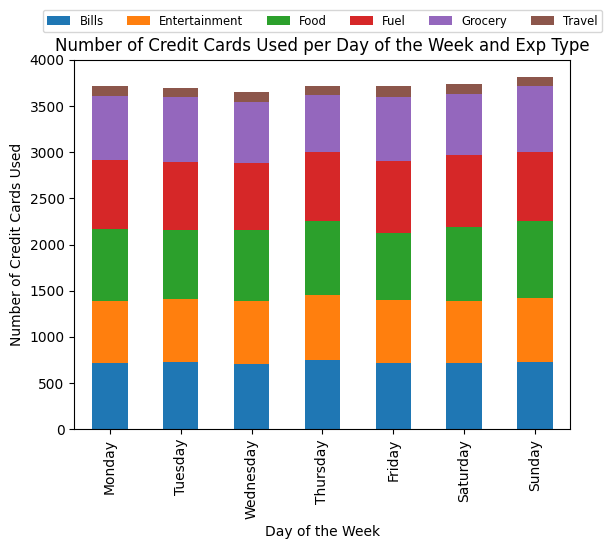

In [ ]:
# Sort the days of the week in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days, ordered=True)

# Count the number of credit cards used for each day of the week and Exp Type
cards_per_day_exp = df.groupby(['DayOfWeek', 'Exp Type'])['index'].count().unstack()

# Plot a stacked bar graph of the number of credit cards used for each day of the week and Exp Type
ax = cards_per_day_exp.plot(kind='bar', stacked=True)

# Adjust the size and position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize='small')

plt.title('Number of Credit Cards Used per Day of the Week and Exp Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Credit Cards Used')
plt.show()

* As we expected,
>   On holidays(ie. Saturday & Sunday), the frequency of credit cards used is more than that of regular days of week. 

**Number of Credit Cards Used per Month stacked with Exp Type**

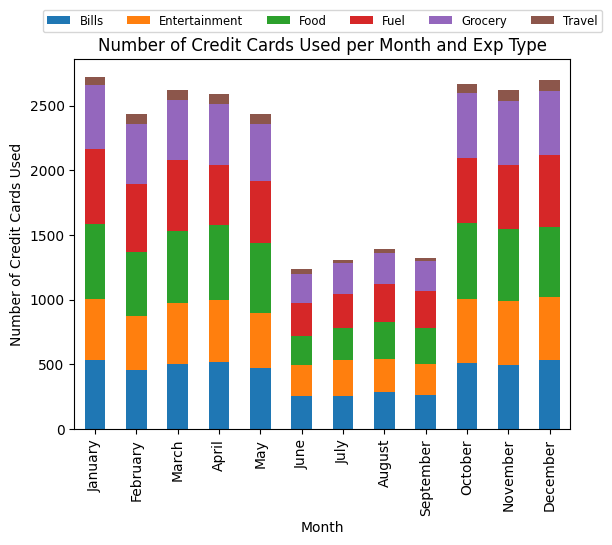

In [ ]:
# Sort the months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

# Count the number of credit cards used for each month and Exp Type
cards_per_month_exp = df.groupby(['Month', 'Exp Type'])['index'].count().unstack()

# Plot a stacked bar graph of the number of credit cards used for each month and Exp Type
ax = cards_per_month_exp.plot(kind='bar', stacked=True)

# Adjust the size and position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize='small')

plt.title('Number of Credit Cards Used per Month and Exp Type')
plt.xlabel('Month')
plt.ylabel('Number of Credit Cards Used')
plt.show()

* Here, we can see that, in rainy season, the no. of credit cards used is less but this is wrong interpretation !!!
* Actually, we have given with data for 3 years but it not for all 36 months...We have data from October 2013 to May 2015...  

## Groupby City

In [ ]:
df_CC_City=df_CC.groupby('City')['index'].count().sort_values(ascending=False)
print(df_CC_City)
df_CC_City=df_CC.groupby('City')
# plt.show(df_CC_City.size().plot(kind='pie'))


City
Bengaluru, India         3552
Greater Mumbai, India    3493
Ahmedabad, India         3491
Delhi, India             3482
Hyderabad, India          784
                         ... 
Tirur, India                1
Mahbubnagar, India          1
Alirajpur, India            1
Varanasi, India             1
Vellore, India              1
Name: index, Length: 986, dtype: int64


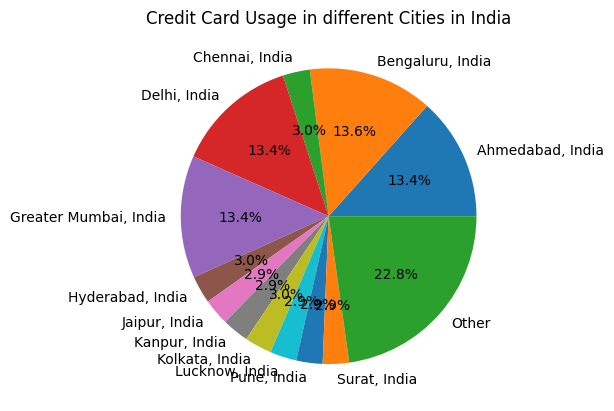

In [ ]:
df=df_CC

# Group the DataFrame by city and count the number of transactions in each city
city_counts = df.groupby('City').size().reset_index(name='Count')

# Set the threshold for grouping smaller categories into "Other"
threshold = 0.01

# Calculate the total count of transactions across all cities
total_count = city_counts['Count'].sum()

# Calculate the count of transactions in each city as a percentage of the total count
city_counts['Percent'] = city_counts['Count'] / total_count

# Group the smaller categories into "Other" if their percentage is below the threshold
small_categories = city_counts[city_counts['Percent'] < threshold]
other_count = small_categories['Count'].sum()
other_percent = small_categories['Percent'].sum()
city_counts = city_counts[city_counts['Percent'] >= threshold]
city_counts.loc[len(city_counts)] = ['Other', other_count, other_percent]

# Create a pie chart of the counts by city
fig, ax = plt.subplots()
ax.pie(city_counts['Count'], labels=city_counts['City'], autopct='%1.1f%%')
ax.set_title('Credit Card Usage in different Cities in India')

plt.show()



* As we can see, 60% of Credit Cards are used in only 4 cities--> Bangalore, Mumbai, Ahmedabad & Delhi.

### **How most credit card using cities spend money for different Expence types?**


In [ ]:
CC_Bangalore=df_CC_City.get_group('Bengaluru, India')
CC_Delhi=df_CC_City.get_group('Delhi, India')
CC_Mumbai=df_CC_City.get_group('Greater Mumbai, India')
CC_Ahmedabad=df_CC_City.get_group('Ahmedabad, India')

# top most four Credit Card using cities in India.
CC_top4=pd.concat([CC_Bangalore, CC_Delhi, CC_Mumbai, CC_Ahmedabad])


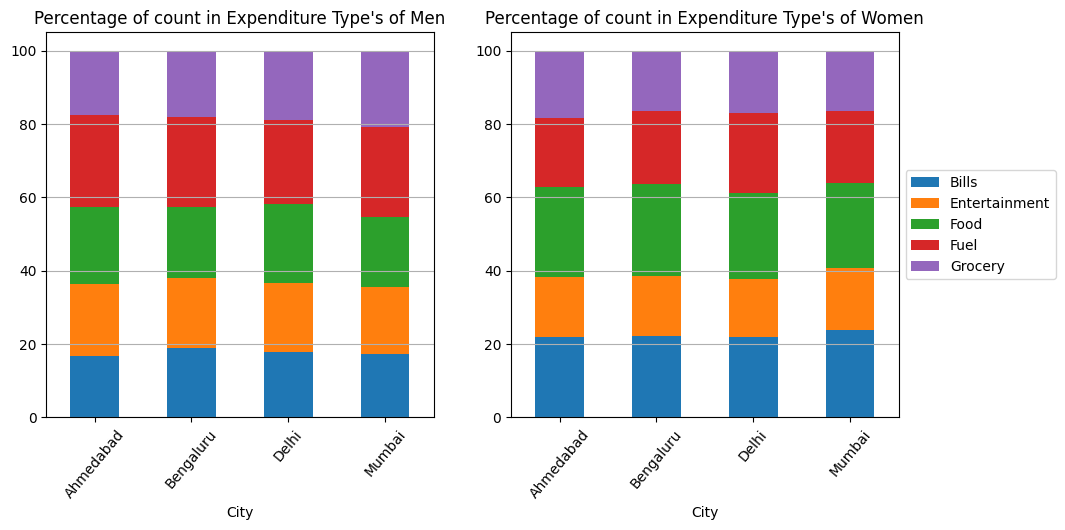

In [ ]:
Cities = ['Ahmedabad','Bengaluru','Delhi','Mumbai']
fig,[ax1,ax2] = plt.subplots(ncols = 2,figsize=(11,5))

CC_top4_M =CC_top4[CC_top4["Gender"] == "M"]
data_agg = pd.crosstab(index = CC_top4_M["City"],columns=[CC_top4_M["Exp Type"]])
data_percent = data_agg.apply(lambda x: round(100 * x / float(x.sum()), 2), axis=1)
data_percent.plot(kind='bar', stacked=True,ax = ax1)
ax1.legend().set_visible(False)
#ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax1.grid(axis = 'y')
ax1.title.set_text("Percentage of count in Expenditure Type's of Men")
ax1.set_xticklabels(Cities, rotation = 50)

CC_top4_F = CC_top4[CC_top4["Gender"] == "F"]
data_agg = pd.crosstab(index = CC_top4_F["City"],columns=[CC_top4_F["Exp Type"]])
data_percent = data_agg.apply(lambda x: round(100 * x / float(x.sum()), 2), axis=1)
data_percent.plot(kind='bar', stacked=True,ax = ax2)
ax2.title.set_text('Percentage of count in Expenditure Type\'s of Women')
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.grid(axis = 'y')
ax2.set_xticklabels(Cities, rotation = 50)
plt.show()

We can clearly see that,
* In these 4 cities, Males are mostly spending money on Fuel while Females spent their money on paying Bills and ordering Food..

## Groupby "Card Type"

## About different types of credit cards
* Gold Credit Cards:
Gold credit cards are typically one step above the basic credit cards and offer a variety of benefits such as higher credit limits, lower interest rates, and better rewards programs than basic credit cards.

* Platinum Credit Cards:
Platinum credit cards are usually considered to be the most prestigious type of credit card available. They offer the highest credit limits, lowest interest rates, and the most exclusive benefits and rewards programs.

* Silver Credit Cards:
Silver credit cards are similar to gold credit cards but typically have fewer benefits and rewards programs than gold credit cards.

* Signature Credit Cards:
A signature credit card is a type of credit card that requires a higher credit score and offers premium benefits and rewards. These cards are often designed for high-spending customers who travel frequently.

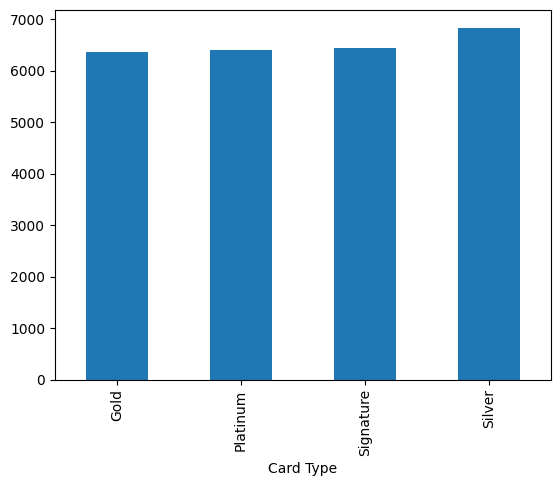

In [ ]:
df_CC_Card_Type=df_CC.groupby('Card Type')
plt.show(df_CC_Card_Type.size().plot(kind='bar'))
df_CC_Silver=df_CC_Card_Type.get_group('Silver')


* Given Credit card data has used only 4 type of credit cards which are uniformly used in all over India.

## Groupby "Exp type"

* "Exp Type" likely refers to the type of expense or purchase made using the credit card. This field can be used to categorize the transactions into different types of expenses, such as food, fuel, bills,groceries, entertainment, travel et.

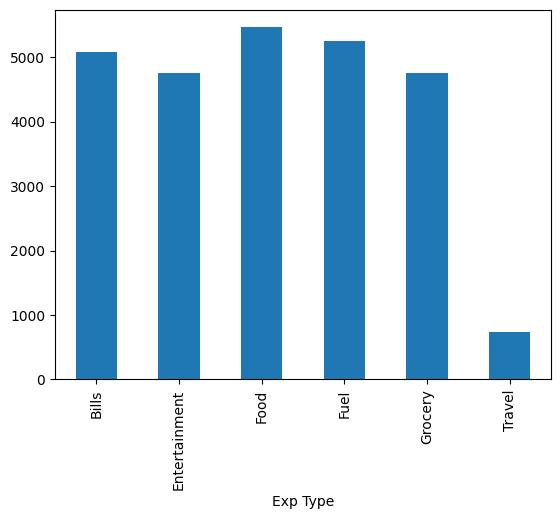

In [ ]:
df_CC_Exp_Type=df_CC.groupby('Exp Type')
plt.show(df_CC_Exp_Type.size().plot(kind='bar'))


* Credit cards are used for 6 different Expenditure types.
* Very few (<1000) times, credit cards are used for Travel.

## groupby "Gender"

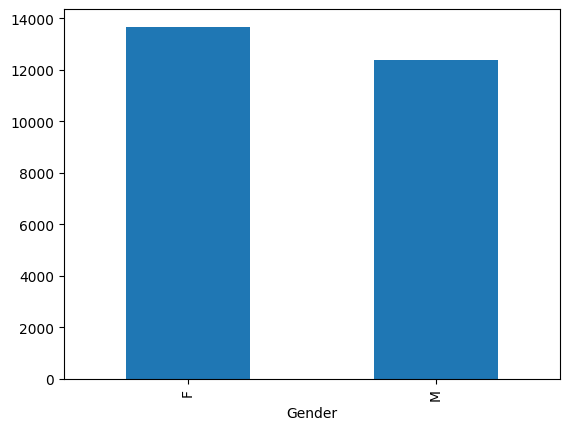

In [ ]:
df_CC_Gender=df_CC.groupby('Gender')
plt.show(df_CC_Gender.size().plot(kind='bar'))


* surprisingly for given data, Females used credit cards more than Males. 

## Count of Expenses by Card Type and Gender with stacking of Exp Type

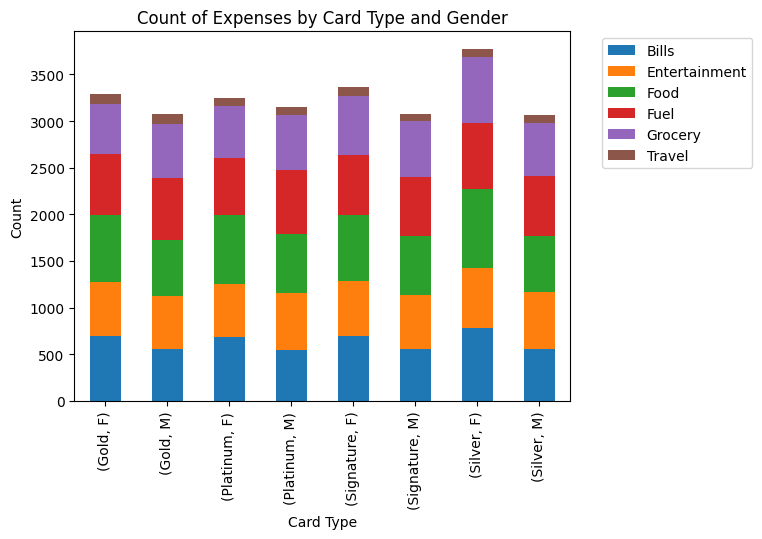

In [ ]:
card_exp_counts = df_CC.groupby(['Card Type', 'Exp Type','Gender']).size().reset_index(name='counts')
pivot_card_exp_counts = card_exp_counts.pivot_table(index=['Card Type','Gender'], columns='Exp Type', values='counts')

ax = pivot_card_exp_counts.plot(kind='bar', stacked=True)
plt.title('Count of Expenses by Card Type and Gender')
plt.xlabel('Card Type')
plt.ylabel('Count')

# adjusting the legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## *B) Insights From "Credit Card Uses Dataset".*

* we have Credit Card Uses data in India of 3 years (2013-2015) with 600 distinct dates.
* Nearly 60% of Credit Cards are used in only 4 cities across India --> Bangalore, Mumbai, Ahmedabad & Delhi.
* Frequency of use of Credit Cards on holidays is more than regular days. 

# ***Conclusion***

# ***`Overall Analysis of All Datasets & Their Interlinking`***

***1) We have given with 4 datasets (Bangalore, Delhi, Credit Card Uses & Startup Fundings) & the only possible way to combine & compare these datasets is using common attribute "location".***

***2) I have found, how increase in startups affects to  plotting in cities like Bangalore and Delhi.***

***3) Startups inc. ---> plotting areas inc. ---> Credit cards uses more to take plots***

***4) Use of credit cards increased mostly for food and fuel --> It's bettere to invest in startups related to food and fuel.***

# Generating EDA Report For Each Dataset.
 **--> It gives brief information and analysis of given csv datafiles.**

In [ ]:
## Reports generated from following code are already saved.

# Bangalore=ProfileReport(df_Bangalore)
# Bangalore.to_file(output_file="Bangalore.html")
# Delhi=ProfileReport(df_Delhi)
# Delhi.to_file(output_file="Delhi.html")
# Pune=ProfileReport(df_Pune)
# Pune.to_file(output_file="Pune.html")

# CC=ProfileReport(df_CC)
# CC.to_file(output_file="CC.html")
# SF=ProfileReport(df_SF)
# SF.to_file(output_file="SF.html")